In [ ]:
#Universidad Nacional Autónoma de México
#Posgrado en Ciencias de la Tierra 
#Campo 1, Geofísica de la Tierra sólida, Sismología

#Elaborado por M.C. Isaías Manuel Ramírez Bañales e Isaac Valverde, 2023

#Programa 4_2: Notebook de Python 3 que carga las muestras generadas por el notebook "Programa4_1.ipynb" y analisa el burning y el lag para obtener una muestra efectiva y posteriormente calcula los coeficientes de variación de cada parámetro

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import emcee

In [2]:
#Funcion que calcula el vector de medias y la matriz de covarianza de la función de densidad de probabilidad posterior a partir de las expresiones de Tarantola y Valette (1982)
#Entradas
#G: Matriz kernel de la inversión (dimensión número de datos por número de parámetros) 
#d: Vector columna que contiene los datos de desplazamiento (de dimensión 1 por número de datos)
#Cdinv: Matriz de covarianza de los datos
#alpha:Valor de alpha para aproximar la distribución apriori
#limsup: Vector que contiene el límite superior del intervalo de truncamiento de cada parámetro
#m0: Media de la distribucion apriori
#Salida
#mv: Vector de medias de la posterior
#Cmv: Matriz de covarianza de la posterior

def mvCmv(G,d,Cdinv,alpha,limsup,m0):
    
    #Se obtiene el número de parámetros
    Nm=np.shape(G)[1]
    #Se obtiene la transpuesta del kernel G
    GT=np.transpose(G)
    #Se define la desviación estandar (pp 373, primer párrafo, quinto renglón)
    sigma=alpha*(limsup/2)
    #Se define la matriz de covarianza de los parámetros (pp) (pp 372, primer parrafo, segundo renglón)
    Cm=np.identity(Nm)*(((np.ones(Nm)*sigma).reshape(Nm,1))**2)
    #Se define la inversa la matriz de covarianza de los parámetros
    Cminv=np.linalg.inv(Cm)
    #Se define la matriz de covarianza posterior (Ecuaciones de Tarantola y Valette, pp. 369, Ec. 7)
    Cmv=np.linalg.inv(np.matmul(np.matmul(GT,Cdinv),G)+Cminv)
    #Se define la transpuesta de la matriz de covarianza posterior
    CmvT=np.transpose(Cmv)
    #Se define la inversa de la matriz de covarianza posterior
    Cmvinv=np.matmul(np.matmul(GT,Cdinv),G)+Cminv
    #Se define la expectativa (Ecuaciones de Tarantola y Valette, pp. 369, Ec. 6)
    mv=np.matmul(np.linalg.inv(np.matmul(np.matmul(GT,Cdinv),G)+Cminv), np.matmul(np.matmul(GT,Cdinv),d)+np.matmul(Cminv,m0))
    return mv, Cmv

In [3]:
#Se define el número de datos (3 componentes por 11 estaciones)
Nd=33
#Se define el número de parámetros (Discretización de falla de 18x18)
Nm=324

In [4]:
#----------------------------Lectura y asignación de datos----------------------------

#Se extraen los datos de la matriz G
Gfile=open("G324.txt", "r")
Gstr=Gfile.read()
Gstrsplit=Gstr.split()

#Se extraen los datos de las estaciones
dfile=open("d.txt", "r")
dstr=dfile.read()
dstrsplit=dstr.split()

#Se define un arreglo para la matriz G
G=np.zeros((Nd,Nm))
#Se define un arreglo para los datos
d=np.zeros((Nd,1))

#Se almacenan los datos de la matriz G y el vector d en los arreglos correspondientes
for i in range (0,Nd):
    G[i,:]=np.array(Gstrsplit[(i*(Nm)):(i*(Nm))+Nm])
    d[i][0]=float(dstrsplit[i])
    
#Se define la transpuesta de la matriz G   
GT=np.transpose(G)

In [5]:
#----------------------------Matriz de covarianza de los datos----------------------------
#Se definen los valores de varianza de cada componente por estación
Vd=[2.1**2,2.5**2,5.1**2]*int(Nd/3)
#Se convierte la lista de valores a un arreglo numpy y las unidades a metros
Vd=np.array(Vd)*(10**-3)
#Se especifíca el vector de varianzas como vector columna
Vd=Vd.reshape(Nd,1)
#Se define una matriz cuya diagonal corresponde al vector de varianzas para obtener la matriz de covarianza de los datos
Cd=Vd*np.identity(Nd)
#Se obtiene la inversa de la matriz de covarianza de los datos
Cdinv=np.linalg.inv(Cd)

In [6]:
#------------------------Espacio de parámetros------------------------

#Se define el límite inferior de los parámetros
liminf=-0.004931
#Se define el límite superior de los parámetros
limsup=4.931506

#Se define un vector con el límite inferior de cada parámetro
a=np.zeros((1,Nm))+liminf
#Se define un vector con el límite superior de cada parámetro
b=np.zeros((1,Nm))+limsup
#Se define un valor de alpha
alpha=8
#Se define un vector con la media de los parámetros (pp 372, primer parrafo, tercer renglón)
m0=np.zeros((Nm,1))+(limsup/2)

In [7]:
#Se calcula el vector de medias y la matriz de covarianza de la posterior
mv_c,Cmv_c=mvCmv(G,d,Cdinv,alpha,limsup,m0)

In [8]:
#Se define un ciclo para cargar las muestras simuladas de la posterior generadas con el notebook "Programa4_1.ipynb"
for i in range(0,140):
    dfaux=pd.read_csv("MuestrasCrudo_a"+str(i+1)+".txt", sep=" ", header=None)
    if(i==0):
        MuestrasCrudo=np.copy(dfaux.to_numpy())
    else:
        MuestrasCrudo=np.concatenate((MuestrasCrudo,dfaux.to_numpy()),axis=0)
    print("Llevamos "+str(i+1))

Llevamos 1
Llevamos 2
Llevamos 3
Llevamos 4
Llevamos 5
Llevamos 6
Llevamos 7
Llevamos 8
Llevamos 9
Llevamos 10
Llevamos 11
Llevamos 12
Llevamos 13
Llevamos 14
Llevamos 15
Llevamos 16
Llevamos 17
Llevamos 18
Llevamos 19
Llevamos 20
Llevamos 21
Llevamos 22
Llevamos 23
Llevamos 24
Llevamos 25
Llevamos 26
Llevamos 27
Llevamos 28
Llevamos 29
Llevamos 30
Llevamos 31
Llevamos 32
Llevamos 33
Llevamos 34
Llevamos 35
Llevamos 36
Llevamos 37
Llevamos 38
Llevamos 39
Llevamos 40
Llevamos 41
Llevamos 42
Llevamos 43
Llevamos 44
Llevamos 45
Llevamos 46
Llevamos 47
Llevamos 48
Llevamos 49
Llevamos 50
Llevamos 51
Llevamos 52
Llevamos 53
Llevamos 54
Llevamos 55
Llevamos 56
Llevamos 57
Llevamos 58
Llevamos 59
Llevamos 60
Llevamos 61
Llevamos 62
Llevamos 63
Llevamos 64
Llevamos 65
Llevamos 66
Llevamos 67
Llevamos 68
Llevamos 69
Llevamos 70
Llevamos 71
Llevamos 72
Llevamos 73
Llevamos 74
Llevamos 75
Llevamos 76
Llevamos 77
Llevamos 78
Llevamos 79
Llevamos 80
Llevamos 81
Llevamos 82
Llevamos 83
Llevamos 84
L

In [9]:
#Se obtiene el IAT de las muestras
IAT=emcee.autocorr.integrated_time(MuestrasCrudo[:,0])
print(IAT)

[311.04141286]


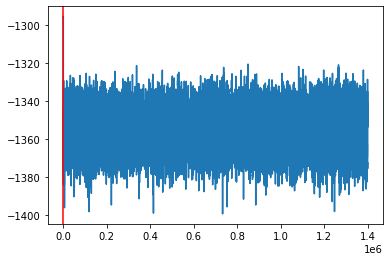

In [28]:
#Se despliega la gráfica de la log PDF de las muestras simuladas
plt.plot(sp.stats.multivariate_normal.logpdf(MuestrasCrudo,mean=mv_c.reshape(Nm),cov=Cmv_c))
#Se dibuja una linea vertical de referencia para observar las muestras que se van a conservar 
plt.axvline(150,c="r")
plt.show()

In [30]:
#Se define a partir de qué muestra se van a utilizar (quemado)
Burnin=150
#Se define el valor del "lag"
lag=400
#Se asignan las muestras luego de aplicar el quemado y el lag (muestra definitiva)
Efectiva=MuestrasCrudo[Burnin::lag,:]

In [31]:
#Se definen arreglos para la media, la desviación estandar y los coeficientes de variación
mu=np.zeros(Nm)
sd=np.zeros(Nm)
CV=np.zeros(Nm)
#Se inicia un ciclo para obtener la media la desviación estandar y el coeficientes de variación para cada parámetro
for i in range(0,Nm):
    mu[i]=np.mean(Efectiva[:,i])
    sd[i]=(np.var(Efectiva[:,i]))**0.5
    CV[i]=(sd[i]/mu[i])*100

In [32]:
#Se desplazan los valores de coeficiente de variación
CV=CV-np.min(CV)
#Se normalizan los coeficientes de variación respecto al valor máximo y se multiplican por 100 
CV=CV/np.max(CV)

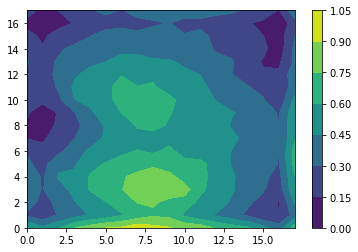

In [33]:
#Se muestran los coeficientes de variación
plt.contourf(np.rot90(CV.reshape(18,18),k=3))
plt.colorbar()
plt.show()